<a href="https://colab.research.google.com/github/ednavivianasegura/Curso_PLN/blob/main/PLN_EDNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# Clona el repositorio
try:
    !git clone https://github.com/ednavivianasegura/Curso_PLN.git
except:
    pass

# Cambiar al directorio "Curso_PLN"
os.chdir("Curso_PLN")

Cloning into 'Curso_PLN'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 151 (delta 65), reused 0 (delta 0), pack-reused 79
Receiving objects: 100% (151/151), 13.02 MiB | 6.10 MiB/s, done.
Resolving deltas: 100% (104/104), done.


<center>
<h1> Curso de especialización.
Estadística aplicada al procesamiento del lenguaje natural (PLN)</h1>
</center>

***

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/LogoCompleto.png?raw=1" alt="LogoUR" width="50%" height="50%">  
</center>

Librerías necesarias durante el proceso

In [2]:
# @title
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.util import ngrams
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import random
from statistics import median




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## ¿Qué es el PLN?

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/que_Es_PLN.png?raw=1" alt="queesPLN" width="50%" height="50%">
</center>

In [3]:
# @title ¿Cómo generar mapa de palabras en Python?
# @title
# stopword_en = nltk.corpus.stopwords.words('english')

# #Creamos la lista de palabras
# stopwords = set(stopword_en)
# # stopwords.update(["br", "href"])
# text = "Natural Language Processing (NLP) is an interdisciplinary field that combines statistics, mathematics, and machine learning techniques to analyze and understand human language. In NLP, words, tokens, and their frequency play a crucial role in building models for language inference. The foundation of Natural Language Processing lies in understanding the nominal, ordinal, and categorical aspects of language. By employing sophisticated algorithms, NLP systems can decipher the semantics and syntax of words and sentences. In NLP, the power of machine learning models is harnessed to process vast amounts of textual data, enabling tasks such as sentiment analysis, text summarization, and information extraction. Through the application of advanced algorithms, NLP practitioners strive to enhance the accuracy and efficiency of language processing systems. Statistics and mathematics form the backbone of Natural Language Processing, providing the theoretical framework for modeling linguistic phenomena and deriving meaningful insights from textual data. By leveraging statistical techniques, NLP algorithms can identify patterns, trends, and correlations within language corpora. In essence, Natural Language Processing is a multifaceted discipline that draws upon diverse domains such as linguistics, computer science, and artificial intelligence. By exploring the intricate interplay between words, semantics, and context, NLP researchers continue to push the boundaries of language understanding and machine intelligence."
# wordcloud = WordCloud(stopwords=stopwords).generate(text)

# plt.imshow(wordcloud,cmap='PiYG_r')
# plt.axis("off")
# plt.tight_layout()
# plt.savefig("mapa_palabras.png", bbox_inches='tight', pad_inches=0, dpi=600)
# plt.show()





## ¿Cómo leen las máquinas?

<center>
  <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/como_leen_las_maquinas.png?raw=1" alt="como leen las maquinas" width="50%"
  height="50%">  
</center>

## ¿Para qué nos sirve la estadística en el PLN?

<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/como_se_utiliza_la_Estadistica_en_pln.png?raw=1" alt="como se utiliza la estadistica en PLN" width="50%" height="50%">  
</center>


***
## ¡Comencemos!
***

## Contenido
### Tablas de frecuencias.
### Gráficos unidimensionales.
### Medidas de una variable cuantitativa:
* de posición:
  * media aritmética
  * mediana y cuantiles
  * moda
* de dispersión:
  * absoluta: recorrido, (cuasi)varianza y (cuasi)desviación típica
  * relativa: recorrido relativo, coeficiente de variación y valores tipificados
* Análisis de frecuencias de n-gramas.


***

### Notación:


Establecemos la siguiente notación para lo que sigue.
* De una variable $X$ tenemos $N$ datos (casos) que pueden ser repetidos o no: $𝑋_1,𝑋_2,…,𝑋_𝑁$ [en mayúsculas].
* Si solo indicamos los valores distintos entre sí: $𝑥_1,𝑥_2,…,𝑥_𝐾$ [en minúsculas] cada uno con su respectiva frecuencia $𝑛_1,𝑛_2,…,𝑛_𝐾$.
Notas:
$𝑁=𝑁_𝐾=𝑛_1+𝑛_2+⋯+𝑛_𝐾=∑𝑛_𝑖$ representa el número de casos (el tamaño de la muestra).
$𝐾$ representa el número de valores distintos entre sí de la variable $𝑋$.


***

## ¿Sabemos qué es una variable o qué tipo de variables existen?
*   Variables numéricas
  *   Discretas (rango finito): es un tipo de variable cuantitativa que solo puede tomar valores aislados, generalmente enteros, que se obtienen mediante un conteo. No admite valores intermedios o decimales. Ejemplo: el número de letras de una palabra.
  *   Continuas (rango infinito): es un tipo de variable cuantitativa que puede tomar cualquier valor dentro de un intervalo, que se obtienen mediante una medición. Admite valores intermedios o decimales. Ejemplo: la longitud de una palabra.

*   Variables categóricas: es un tipo de variable que suelen describir cualidades de los datos.
  *   Las variables ordinales: se pueden clasificar en cualquier rango. Ej: categorizar las palabras según su longitud en diferentes grupos ordenados, como:
        * Palabras cortas (1-3 caracteres)
        * Palabras de longitud media (4-6 caracteres)
        * Palabras largas (7 o más caracteres)
  *   Variables nominales: no se pueden clasificar, simplemente contienen nombres o números de categorías. Ej: categorías gramaticales, como sustantivos, verbos, adjetivos, adverbios, pronombres, preposiciones, conjunciones, entre otros.





## Ejemplo de conjunto de datos:

Conjunto de datos de *Amazon Fine Food Reviews de Kaggle* (archivo disponible en [Reviews.csv](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews))
Se cuenta con un total 568454 reseñas de productos de Amazon.

En este proyecto, utilizaremos una muestra aleatoria que contiene 45476 reseñas.

* Text – Reseña completa del artículo
* Summary – Breve resumen de la reseña.
* Score – Calificación del artículo proporcionada por el cliente.



In [4]:
# @title
df = pd.read_csv('Reviews.csv')
N=df.shape[0]
print(f"Información disponible en el dataframe:\n{list(df.columns)}\nEl dataframe contiene {N} reseñas\n")
display(df.loc[:,['Id', 'ProductId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text']].head())

Información disponible en el dataframe:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
El dataframe contiene 45476 reseñas



,Id,ProductId,ProfileName,Score,Time,Summary,Text
0,165257,B000EVG8J2,"B. Miller ""pet person""",5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
1,231466,B0000BXJIS,Marty,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
2,427828,B008FHUFAU,Kenneth Shevlin,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
3,433955,B006BXV14E,rareoopdvds,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
4,70261,B007I7Z3Z0,Og8ys1,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


Funciones importantes a usar durante el proceso

In [5]:
# @title
#Estas funciones se explican posteriormente

def group_by_sturges(df, column):
    num_bins = int(np.ceil(np.log2(len(df[column])) + 1))
    bin_width = (df[column].max() - df[column].min()) / num_bins
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)

    # Generar etiquetas para los intervalos basados en los límites de los intervalos
    labels = [f"[{round(bin_edges[i],2)}-{round(bin_edges[i+1],2)})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def group_by_sqrt(df, column):
    num_bins = int(math.sqrt(df.shape[0]))
    bin_width = (df[column].max() - df[column].min()) / num_bins
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)

    # Generar etiquetas para los intervalos basados en los límites de los intervalos
    labels = [f"[{round(bin_edges[i],2)}-{round(bin_edges[i+1],2)})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def marca_de_clase(intervalo):
    limite_inferior, limite_superior = map(float, intervalo.strip("[]()").split('-'))
    return (limite_inferior + limite_superior) / 2

Para complementar la información proporcionada por el dataframe, se crean dos variables adicionales, una llamada *Longitud_Texto* que cuenta el número de palabras en cada reseña y otra, llamada *Num_Palabras_Unicas* que cuenta el número de palabras únicas (es decir sin que se repitan) en cada reseña.

In [6]:
# @title
# Creamos una nueva variable que contiene el número de palabras que componene
# Contar la longitud de las palabras en la columna 'texto'
df['Longitud_Texto'] = df['Text'].apply(lambda x: len(x.split()))
# Calcula el número de palabras únicas en la columna 'Text'
df['Num_Palabras_Unicas'] = df['Text'].apply(lambda x: len(set(x.split())))

display(df.loc[:,['Id','Score', 'Summary', 'Text','Longitud_Texto','Num_Palabras_Unicas']].head())


,Id,Score,Summary,Text,Longitud_Texto,Num_Palabras_Unicas
0,165257,5,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,84,64
1,231466,5,great kitty treats,My cat loves these treats. If ever I can't fin...,99,75
2,427828,3,COFFEE TASTE,A little less than I expected. It tends to ha...,28,26
3,433955,2,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",294,191
4,70261,5,Great Taste . . .,and I want to congratulate the graphic artist ...,122,88


## TABLA DE FRECUENCIAS

También denominadas tabulaciones, resumen los datos de una variable.

Para cada valor observado $𝑥_{𝑖}$, en la tabla se indica:
* La frecuencia absoluta $𝑛_{𝑖}$ es el número de veces que se da el valor $𝑥_{𝑖}$.
* La frecuencia relativa $𝑓_{𝑖}=\frac{𝑛_{𝑖}}{𝑁}$ donde $𝑁$ es el número de casos. Notas:
    * $0 < f_{𝑖} \leq1$, representa la proporción de $𝑥_{𝑖}$;
    * se suele expresar en porcentaje: $𝑓_{𝑖}\times100$%.

Si la variable es cuantitativa o si es ordinal (esto es, sus valores se pueden ordenar), ordenamos los valores observados de manera creciente $𝑥_{1}<𝑥_{2}<⋯$ y también indicamos:
* La frecuencia absoluta acumulada $𝑁_{𝑖}=𝑛_{1}+𝑛_{2}+⋯+𝑛_{𝑖}$ es el número de casos menores o iguales que $𝑥_{𝑖}$.
* La frecuencia relativa acumulada $𝐹_{𝑖}=𝑓_{1}+𝑓_{2}+⋯+𝑓_{𝑖}$ . Notas:
    * $0 < F_{𝑖} \leq1$, representa la proporción de valores menores o iguales que $𝑥_{𝑖}$;
    * también se suele expresar en tanto por ciento: $𝐹_{𝑖}\times100$%.


**Ejercicio:**

Crear la tabla de frecuencias de la variable *longitud de palabras*:

In [7]:
# @title
#Creamos la tabla de frecuencias de la variable "longitud de palabras":

frecuencias_long = df['Longitud_Texto'].value_counts()
frecuencias_long = frecuencias_long.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_long / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_long.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_long.index,
    'n_i': frecuencias_long.values,
    'f_i': frecuencias_relativas.values,
    'N_i':frecuencias_acumuladas.values,
    'F_i':frecuencias_relativas_acum.values
})


print("Tabla de frecuencias de la columna\n'Longitud del texto\n(número de palabras dentro de cada reseña)':\n")
display(tabla_frecuencias)



Tabla de frecuencias de la columna
'Longitud del texto
(número de palabras dentro de cada reseña)':



,x_i,n_i,f_i,N_i,F_i
0,6,1,0.000022,1,0.000022
1,7,5,0.000110,6,0.000132
2,9,1,0.000022,7,0.000154
3,10,3,0.000066,10,0.000220
4,11,7,0.000154,17,0.000374
...,...,...,...,...,...
593,1447,1,0.000022,45472,0.999912
594,1513,1,0.000022,45473,0.999934
595,1600,1,0.000022,45474,0.999956
596,1736,1,0.000022,45475,0.999978


### TABLA DE FRECUECIAS POR INTERVALOS

Si una variable cuenta con una gran cantidad de valores distintos, como es el caso de la variable *Longitud del texto*, a menudo se resumen en una tabla de frecuencias, reduciéndola por intervalos. En este caso la frecuencia, $𝑛_𝑖$, es el número de casos cuyos valores se encuentran en el 𝑖-ésimo intervalo.

***Intervalos***:
Cada intervalo está determinado por sus límites. Esto es, el intervalo $𝑎⟷𝑏$ representa los valores comprendidos entre $𝑎$ y $𝑏$.


Si se requiere determinar la ubicación de los límites, estos pueden ser referidos con una notación más completa. Generalmente se utilizan intervalos abiertos por la izquierda y cerrados por la derecha: $(𝑎,𝑏]$. Esto es, incluye los valores comprendidos entre $𝑎$ y $𝑏$, $𝑏$ incluido y $𝑎$ excluido.

La amplitud de intervalo $𝑎⟷𝑏$ es $𝑏−𝑎$, que también es la amplitud de los intervalos $(𝑎,𝑏]$ y $[𝑎,𝑏)$ (este último intervalo representa los valores mayores o iguales que $𝑎$ y menores que $𝑏$).

En las tablas de frecuencias los intervalos pueden ser de amplitud constante (más cómodo) o variable.

La densidad de frecuencia de un intervalo es la razón de su frecuencia absoluta sobre su amplitud. El intervalo $𝑖$ con frecuencia absoluta $𝑛_𝑖$ y amplitud $𝑎_𝑖$ tiene una densidad de frecuencia $ℎ_𝑖=𝑛_𝑖/𝑎_𝑖$.


En las variables cuantitativas la marca de clase de un intervalo es el valor concreto de la variable que representa cada intervalo, generalmente se toma el punto medio del intervalo. El punto medio de $(𝑎,𝑏]$ es: $(a+b)/2$. Para calcular medidas cuantitativas de una variable reducida por intervalos se usan las marcas de clase.

***Algunos métodos disponibles para calcular el número de intervalos:***

Llamaremos $k$ al número de intervalos y $N$ al número de datos.

Si $N > 100$ $k = [ 10, 20 ]$

* Regla de Sturges:

$$k = 1 + 3.322 \log_{10}(N)$$

* Regla de la raíz cuadrada: si $N < 100$ no convine que $k > \sqrt{N}$
$$k = \sqrt{N}$$





**Ejemplo**:

Resumimos los valores de la variable *Longitud del texto* por unos intervalos indicados.

Tras hacer el recuento obtenemos la siguiente tabla.

In [8]:
# @title
# Calcular los grupos usando la función creada group_by_sturges
df['group_sturges'] = group_by_sturges(df, 'Longitud_Texto')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
print("\nFrecuencias usando el método de sturges\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase = list(map(marca_de_clase, list(frecuencias_grupo.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_Longitud_Texto = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'MarcaDeClase':MarcaDeClase})

print(tabla_frecuencias_Longitud_Texto)
print(frecuencias_grupo.index)
# print(MarcaDeClase)



Frecuencias usando el método de sturges

                  x_i    n_i  MarcaDeClase
0        [6.0-117.47)  37157        61.735
1     [117.47-228.94)   6342       173.205
2     [228.94-340.41)   1298       284.675
3     [340.41-451.88)    394       396.145
4     [451.88-563.35)    167       507.615
5     [563.35-674.82)     42       619.085
6     [674.82-786.29)     23       730.555
7     [786.29-897.76)     33       842.025
8    [897.76-1009.24)      7       953.500
9   [1009.24-1120.71)      2      1064.975
10  [1120.71-1232.18)      2      1176.445
11  [1232.18-1343.65)      2      1287.915
12  [1343.65-1455.12)      3      1399.385
13  [1455.12-1566.59)      1      1510.855
14  [1566.59-1678.06)      1      1622.325
15  [1678.06-1789.53)      1      1733.795
16   [1789.53-1902.9)      1      1846.215
CategoricalIndex(['[6.0-117.47)', '[117.47-228.94)', '[228.94-340.41)',
                  '[340.41-451.88)', '[451.88-563.35)', '[563.35-674.82)',
                  '[674.82-786.29)', 

Podemos ver que hay varios intervalos con muy poca densidad de frecuencia, por lo que podemos unir los intervalos consecutivos en uno solo:

In [9]:
# @title
# agrupar los últimos grupos en uno solo:

lista=[ '[897.76-1009.24)',
                  '[1009.24-1120.71)', '[1120.71-1232.18)',
                  '[1232.18-1343.65)', '[1343.65-1455.12)',
                  '[1455.12-1566.59)', '[1566.59-1678.06)',
                  '[1678.06-1789.53)', '[1789.53-1902.9)']

# Reemplazar los valores en la columna 'columna_original' con ">1472.571" si coinciden con los valores de la lista
df['group_sturges'] = df['group_sturges'].replace(lista, '[897.76-1902.9]')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_gr = frecuencias_grupo / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr = frecuencias_grupo.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr = frecuencias_acumuladas_gr / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_gr = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'f_i': frecuencias_relativas_gr.values,
    'N_i':frecuencias_acumuladas_gr.values,
    'F_i':frecuencias_relativas_acum_gr.values
})


print("Tabla de frecuencias agrupadas por intervalo de la columna\n'Longitud del texto':\n")
display(tabla_frecuencias_gr)


Tabla de frecuencias agrupadas por intervalo de la columna
'Longitud del texto':



,x_i,n_i,f_i,N_i,F_i
0,[6.0-117.47),37157,0.817068,37157,0.817068
1,[117.47-228.94),6342,0.139458,43499,0.956527
2,[228.94-340.41),1298,0.028543,44797,0.985069
3,[340.41-451.88),394,0.008664,45191,0.993733
4,[451.88-563.35),167,0.003672,45358,0.997405
5,[563.35-674.82),42,0.000924,45400,0.998329
6,[674.82-786.29),23,0.000506,45423,0.998835
7,[786.29-897.76),33,0.000726,45456,0.999560
8,[897.76-1902.9],20,0.000440,45476,1.000000


In [10]:
# @title TabFreq_conteo_unico { display-mode: "form" }
#Creamos la tabla de frecuencias de la variable "Num_Palabras_Unicas":

frecuencias_long_unic = df['Num_Palabras_Unicas'].value_counts()
frecuencias_long_unic = frecuencias_long_unic.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_unic = frecuencias_long_unic / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_unic = frecuencias_long_unic.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_unic = frecuencias_relativas_unic / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_unic = pd.DataFrame({
    'x_i': frecuencias_long_unic.index,
    'n_i': frecuencias_long_unic.values,
    'f_i': frecuencias_relativas_unic.values,
    'N_i':frecuencias_acumuladas_unic.values,
    'F_i':frecuencias_relativas_acum_unic.values
})



# Calcular los grupos usando la función creada group_by_sturges
df['group_sturges_unic'] = group_by_sturges(df, 'Num_Palabras_Unicas')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo_unic = df['group_sturges_unic'].value_counts()
frecuencias_grupo_unic = frecuencias_grupo_unic.sort_index()
print("\nFrecuencias usando el método de sturges en conteo único\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase_unic = list(map(marca_de_clase, list(frecuencias_grupo_unic.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_Num_Palabras_Unicas = pd.DataFrame({
    'x_i': frecuencias_grupo_unic.index,
    'n_i': frecuencias_grupo_unic.values,
    'MarcaDeClase':MarcaDeClase_unic})

print(tabla_frecuencias_Num_Palabras_Unicas)





Frecuencias usando el método de sturges en conteo único

                x_i    n_i  MarcaDeClase
0       [6.0-55.35)  27209        30.675
1    [55.35-104.71)  12774        80.030
2   [104.71-154.06)   3696       129.385
3   [154.06-203.41)   1081       178.735
4   [203.41-252.76)    387       228.085
5   [252.76-302.12)    161       277.440
6   [302.12-351.47)     87       326.795
7   [351.47-400.82)     24       376.145
8   [400.82-450.18)     36       425.500
9   [450.18-499.53)      7       474.855
10  [499.53-548.88)      3       524.205
11  [548.88-598.24)      1       573.560
12  [598.24-647.59)      3       622.915
13  [647.59-696.94)      4       672.265
14  [696.94-746.29)      1       721.615
15  [746.29-795.65)      1       770.970
16  [795.65-845.84)      1       820.745


### Ejercicio 1:

Resumimos los valores de la variable *Score*, realizando los conteos necesarios:

Tras hacer el recuento obtenemos la siguiente tabla.

In [11]:
# @title
# Calcular la tabla de frecuencias de la columna 'Score'
frecuencias_score = df['Score'].value_counts()
frecuencias_score = frecuencias_score.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_score / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_score.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)


# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_score.index,
    'n_i': frecuencias_score.values,
    'f_i': frecuencias_relativas.values,
    "N_i":frecuencias_acumuladas.values,
    "F_i":frecuencias_relativas_acum.values
})
display(tabla_frecuencias)

,x_i,n_i,f_i,N_i,F_i
0,1,4144,0.091125,4144,0.091125
1,2,2347,0.051610,6491,0.142735
2,3,3439,0.075622,9930,0.218357
3,4,6411,0.140975,16341,0.359332
4,5,29135,0.640668,45476,1.000000


Observa la tabla de frecuencias del puntaje (score) de las reseñas de Amazon y contesta a las siguientes preguntas:


1.   ¿Cuántas reseñas fueron valoradas con 4?
2.   ¿Cuántas reseñas fueron valoradas con menos de 3?
3.   ¿Cuántas reseñas tienen 4 o menos de valoración?
4.   ¿Cuántas reseñas tienen más de 4 puntos de valoración?
5.   ¿Cuál es la proporción de reseñas con puntaje igual a 3?
6.   ¿Cuál es la proporción de reseñas menores a 3?
7.   ¿Cuál es la proporción de reseñas mayores de 2?



***


In [12]:
# @title Rta
# @title
print(f"1. ¿Cuántas reseñas fueron valoradas con 4?: {tabla_frecuencias[tabla_frecuencias['x_i']==4]['n_i'].values[0]}")
print(f"2. ¿Cuántas reseñas fueron valoradas con menos de 3?: {tabla_frecuencias[tabla_frecuencias['x_i']<3]['n_i'].values.sum()}")
print(f"3. ¿Cuántas reseñas tienen 4 o menos de valoración?: {tabla_frecuencias[tabla_frecuencias['x_i']<5]['n_i'].values.sum()}")
print(f"4. ¿Cuántas reseñas tienen más de 4 puntos de valoración?: {tabla_frecuencias[tabla_frecuencias['x_i']>4]['n_i'].values.sum()}")
print(f"5. ¿Cuál es la proporción de reseñas con puntaje igual a 3?: {round(tabla_frecuencias[tabla_frecuencias['x_i']==3]['f_i'].values.sum(),4)} ó {round(tabla_frecuencias[tabla_frecuencias['x_i']==3]['f_i'].values.sum()*100,4)}%")
print(f"6. ¿Cuál es la proporción de reseñas menores a 3?: {round(tabla_frecuencias[tabla_frecuencias['x_i']==2]['F_i'].values[0],4)} ó {round(tabla_frecuencias[tabla_frecuencias['x_i']==2]['F_i'].values[0]*100,4)}%")
print(f"7. ¿Cuál es la proporción de reseñas mayores de 2?: {round(tabla_frecuencias[tabla_frecuencias['x_i']>2]['f_i'].values.sum(),3)} ó {round(tabla_frecuencias[tabla_frecuencias['x_i']>2]['f_i'].values.sum()*100,3)}%")

1. ¿Cuántas reseñas fueron valoradas con 4?: 6411
2. ¿Cuántas reseñas fueron valoradas con menos de 3?: 6491
3. ¿Cuántas reseñas tienen 4 o menos de valoración?: 16341
4. ¿Cuántas reseñas tienen más de 4 puntos de valoración?: 29135
5. ¿Cuál es la proporción de reseñas con puntaje igual a 3?: 0.0756 ó 7.5622%
6. ¿Cuál es la proporción de reseñas menores a 3?: 0.1427 ó 14.2735%
7. ¿Cuál es la proporción de reseñas mayores de 2?: 0.857 ó 85.727%


## GRÁFICOS UNIDIMENSIONALES

Para variables **discretas** (toman pocos valores distintos):

* Gráficos de sectores: cada valor ocupa un sector circular cuya proporción de área (con respecto al círculo que representa el total) es la frecuencia relativa.  
* Gráficos de barras. De dos tipos:
  * de valores: una barra por cada caso ($𝑁$ barras), de manera que la altura de barra 𝑖-ésima expresa el valor 𝑋_𝑖;
  * de frecuencias: una barra por cada valor distinto $𝑥_𝑖$, de manera que la altura de la barra $𝑥_𝑖$ expresa su frecuencia absoluta $𝑛_𝑖$.

Para variables **continuas** (toman un amplio rango de posibles valores):
* histogramas.
Son gráficos de rectángulos pegados cuyas bases representan los intervalos determinados y cuyas alturas representan sus densidades ($ℎ_𝑖/𝑁$).

Se puede considerar que son gráficos de barras de frecuencias especiales.


### Gráfico de sectores:

Text(0.5, 1.0, 'Gráfico de frecuencia del Score')

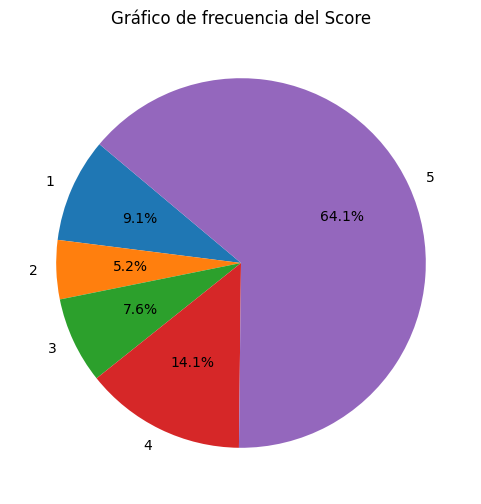

In [13]:
# @title
sizes = tabla_frecuencias.n_i
labels = tabla_frecuencias.x_i

plt.figure(figsize=(6, 6))  # Tamaño del gráfico (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Agregar un título
plt.title('Gráfico de frecuencia del Score')
# plt.savefig("Pie_chart_score.png", bbox_inches='tight', pad_inches=0, dpi=600)

### Gráfico de barras de valores:

Para visualizar un ejemplo de gráfico de barras, creamos una nueva variable *Sentiment* que divide en dos grupos las reseñas.
Aquellas reseñas con Score = 1, 2 o 3 son catalogadas como "Malo"
Aquellas reseñas con Score = 4 o 5 son catalogadas como "Buenas"

Frecuencias por tipo de sentimiento:
Malo (1-3)      9930
Bueno (4-5)    35546
Name: sentiment, dtype: int64


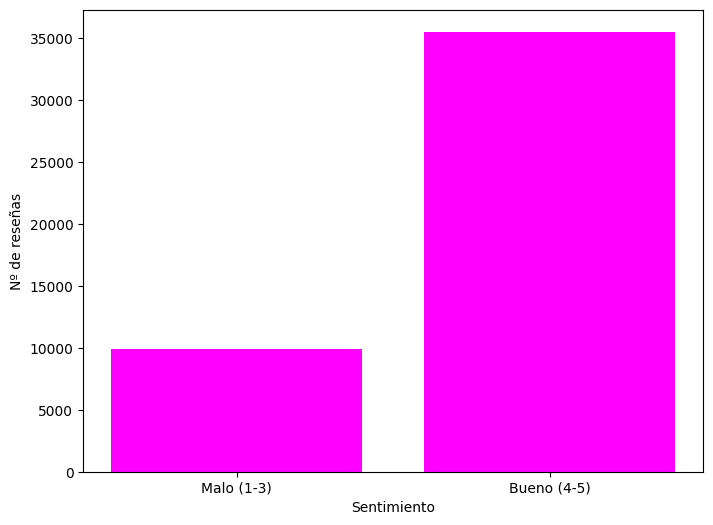

In [14]:
# @title
#Primero clasificaremos las reseñas en doos grupos (buenas o malas)
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
df['sentiment'] = pd.cut(df['Score'], bins=[1,4,6], labels=['Malo (1-3)', 'Bueno (4-5)'], right=False)

frecuencias_sentiment = df['sentiment'].value_counts()
frecuencias_sentiment = frecuencias_sentiment.sort_index()

print(f"Frecuencias por tipo de sentimiento:\n{frecuencias_sentiment}")

# Datos de ejemplo
labels = frecuencias_sentiment.index
sizes = frecuencias_sentiment.values

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
plt.bar(labels, sizes, color='magenta')

# Agregar etiquetas y título
plt.ylabel('Nº de reseñas')
plt.xlabel('Sentimiento')
# plt.title('Gráfico de sentimeinto')
# plt.savefig("bar_chart_score_agrupado.png", bbox_inches='tight', pad_inches=0, dpi=600)

# Mostrar el gráfico
plt.show()

### Histograma:

Histograma del puntaje de las reseñas (Score):


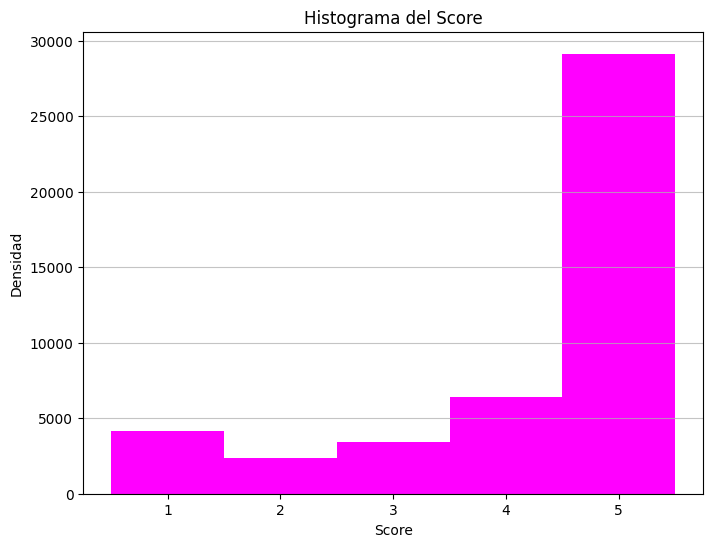

Frecuencia del bin 1.0 - 2.0: 4144.0
Frecuencia del bin 2.0 - 3.0: 2347.0
Frecuencia del bin 3.0 - 4.0: 3439.0
Frecuencia del bin 4.0 - 5.0: 6411.0
Frecuencia del bin 5.0 - 6.0: 29135.0


In [15]:
# @title
data=list(df['Score'].values)
# Crear el histograma con las barras juntas y densidad
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

# Agregar etiquetas y título
plt.xlabel('Score')
plt.ylabel('Densidad')
plt.title('Histograma del Score')

# Mostrar el histograma
plt.grid(axis='y', alpha=0.75)
plt.show()

#para mostrar las frecuencias reltativas en vez de las aboslutas usar: values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

for i in range(len(values)):
    print(f"Frecuencia del bin {bins[i]} - {bins[i+1]}: {values[i]}")

## Medidas de tendencia central

Para hacer manejable la masa de datos procedentes de la observación estadística, es necesario resumir el volumen de los datos. Ya hemos visto cómo reducir y organizar la masa de datos con las tablas de frecuencias.

En el caso de las **variables cuantitativas**, es posible reducir aún más esta información, valiéndonos de unos pocos valores que las describan y caractericen. Estos valores, que llamamos estadísticos, nos indican las características más importantes de las distribuciones de frecuencias y se suelen clasificar en los siguientes grupos:

* de posición:
    * media aritmética
    * mediana
    * cuantiles
    * moda
* de dispersión:
    * (cuasi)varianza
    * (cuasi)desviación típica
    * coeficiente de variación
* de concentración: índice de Gini.

### Medidas de posición:

Las **medidas de posición** resumen la distribución de los valores de una variable.

Para que un valor pueda ser considerado una medida de posición tiene que tomar un valor **comprendido entre el mínimo y el máximo de la variable.**

Existen dos tipos de medidas de posición: las **centrales** y las **no centrales**.

De las medidas de posición central, las más utilizadas son: la **media aritmética**, la **mediana** y la **moda**.

Los **cuantiles** son las medidas de posición no central.


## Media Aritmética

La media aritmética es la suma de todos los valores observados de la distribución, dividida por el número total de casos.
$$\bar{X}=\frac{1}{N} \sum_{(𝑖=1)}^{𝑁}𝑋_{𝑖} =\frac{(𝑋_1+𝑋_2+…+𝑋_𝑁)}{N}$$.

Si tenemos $𝐾$ valores distintos que se repiten, y conocemos sus frecuencias, podemos calcular la media como:
$$\bar{X}=\frac{1}{N} \sum_{(𝑖=1)}^{𝑁}n_{𝑖}𝑥_{𝑖} =\frac{(𝑛_1 𝑥_1+𝑛_2 𝑥_2+…+𝑛_𝑘 𝑥_𝐾)}{N}$$.

In [16]:
print(f"La suma de X_i para el ejercicio es {df['Longitud_Texto'].sum()}" )
print(f"El tamaño (N) de X_i para el ejercicio es {N}")


La suma de X_i para el ejercicio es 3638051
El tamaño (N) de X_i para el ejercicio es 45476


### Ejercicios:

Calcular la media aritmética en las siguientes situaciones.

1. Para la variable $X=(4, 7, 5, 7, 5, 4, 2, 7)$.

2. Para la variable **Longitud_Texto**:

    Sabiendo que $\sum 𝑋_{𝑖}=3638051$   y $N= 45476$

3. Usando la reducción por intervalos de la tabla de frecuencias de la variable **Longitud_Texto** (Cálculo de la marca de clase)


### Media aritmética de datos agrupados:

In [17]:
# @title Rta1 y 2 { display-mode: "code" }
# @title
X = [4, 7, 5, 7, 5, 4, 2, 7]
x_hat = round(sum(X) / len(X),2)
# Imprimir el texto junto con la variable y su valor
print(f"1. Para la variable X = {X}: \u0302x={x_hat}")

# Para la variable Longitud_Texto:
x_hat = round(df["Longitud_Texto"].mean(),2)
suma = df["Longitud_Texto"].sum()
n = N
print(f"2. Para la variable Longitud_Texto: \u0302x={suma}/{n}={x_hat}")



1. Para la variable X = [4, 7, 5, 7, 5, 4, 2, 7]: ̂x=5.12
2. Para la variable Longitud_Texto: ̂x=3638051/45476=80.0


In [18]:
# Mostrar la tabla de frecuencias con la marca de clase
print(tabla_frecuencias_Longitud_Texto[['x_i','MarcaDeClase','n_i']])

                  x_i  MarcaDeClase    n_i
0        [6.0-117.47)        61.735  37157
1     [117.47-228.94)       173.205   6342
2     [228.94-340.41)       284.675   1298
3     [340.41-451.88)       396.145    394
4     [451.88-563.35)       507.615    167
5     [563.35-674.82)       619.085     42
6     [674.82-786.29)       730.555     23
7     [786.29-897.76)       842.025     33
8    [897.76-1009.24)       953.500      7
9   [1009.24-1120.71)      1064.975      2
10  [1120.71-1232.18)      1176.445      2
11  [1232.18-1343.65)      1287.915      2
12  [1343.65-1455.12)      1399.385      3
13  [1455.12-1566.59)      1510.855      1
14  [1566.59-1678.06)      1622.325      1
15  [1678.06-1789.53)      1733.795      1
16   [1789.53-1902.9)      1846.215      1


In [19]:
# @title Rta 3.
marcas_de_clase =  tabla_frecuencias_Longitud_Texto['MarcaDeClase']
frecuencias     =  tabla_frecuencias_Longitud_Texto['n_i']
# Calculando la suma de los productos de las marcas de clase y las frecuencias
suma_productos = sum(marcas_de_clase[i] * frecuencias[i] for i in range(len(marcas_de_clase)))

# # Calculando el total de observaciones
total_observaciones = sum(frecuencias)

# # Calculando la media aritmética
x_hat = suma_productos / total_observaciones

print(f"3. Para la variable Longitud_Texto en datos agrupados:\n\u0302x={round(x_hat,2)}")

3. Para la variable Longitud_Texto en datos agrupados:
̂x=90.11


### Media aritmética: pros



Tiene en cuenta **todos los valores observados**.

Es **fácil de calcular.**

Tiene un **claro significado estadístico:** representa el valor que tomaría cada una de las observaciones si el total se repartiera de manera equitativa.

Es **única**.

### Media aritmética: contra

Los valores extremos ejercen gran influencia sobre el valor de la media aritmética (un valor extremo es un dato excepcionalmente pequeño o grande en comparación con el resto)




In [20]:
Datos1 = [2,5,7,9,12]
Datos2 = [2,5,7,9,125]
Datos = pd.DataFrame({
    'Datos1': Datos1,
    'Datos2': Datos2
})
display(Datos)

,Datos1,Datos2
0,2,2
1,5,5
2,7,7
3,9,9
4,12,125


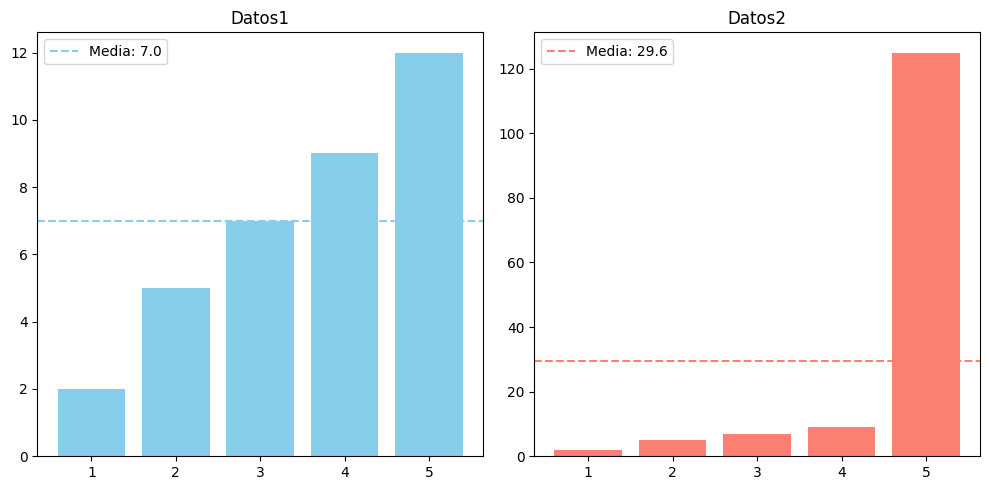

La media de los Datos 1 es 7.0

La media de los Datos 2 es 29.6


In [21]:
# Calcular las medias de Datos1 y Datos2
media_datos1 = sum(Datos1) / len(Datos1)
media_datos2 = sum(Datos2) / len(Datos2)

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras para Datos1
axs[0].bar(range(len(Datos1)), Datos1, color='skyblue')
axs[0].axhline(y=media_datos1, color='skyblue', linestyle='--', label=f'Media: {media_datos1}')
axs[0].set_title('Datos1')
axs[0].set_xticks(range(len(Datos1)))
axs[0].set_xticklabels(range(1, len(Datos1) + 1))
axs[0].legend()

# Gráfico de barras para Datos2
axs[1].bar(range(len(Datos2)), Datos2, color='salmon')
axs[1].axhline(y=media_datos2, color='salmon', linestyle='--', label=f'Media: {media_datos2}')
axs[1].set_title('Datos2')
axs[1].set_xticks(range(len(Datos2)))
axs[1].set_xticklabels(range(1, len(Datos2) + 1))
axs[1].legend()

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

print(f'La media de los Datos 1 es {media_datos1}\n\nLa media de los Datos 2 es {media_datos2}')

### Media aritmética: propiedades

* La suma de las desviaciones de los valores de la variable, respecto a su media aritmética, es igual a cero:
$$\sum(X_{i}−\bar{X})= 0 $$.

* Si transformamos los valores de la variable  a través de un cambio de origen y escala $(U=a+bX)$, la media aritmética de la variable transformada es $\bar{U}= a+b\bar{X}$.

* En particular (para $b=1$) si $U=a+X$ entonces $\bar{U}= a+\bar{X}$.

    * Ejemplo. Supongamos que tenemos el peso de $N = 20$ personas $X = (59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87)$.

    * Ahora, supongamos que hacemos la tranformación $\bar{U}= a+\bar{X}$ dónde $a=10$ y $b=1$, entonces $U = (69, 51, 65, 89, 71, 93, 53, 64, 99, 67, 90, 96, 77, 66, 90, 52, 70, 93, 86, 9)$

    * Entonces $\bar{U}= a+\bar{X} = 10 + \frac{\sum_{i}{X}}{20} ≡ \frac{\sum_{i}U}{20}$
  



In [22]:
# Generar la lista X
# X = [random.randint(40, 90) for _ in range(20)]
X = [59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87]

print(f"Lista X: {X}\ny la suma de X: {sum(X)}")

a = 10
b = 1

# Generar la lista U.
U = [b*x + a for x in X]

print(f"Lista U: {U}\ny la suma de U: {sum(U)}")

x_bar= sum([i for i in X]) / len([i for i in X])


print("utilizando la conversión:\n")

print(f"La media de U = {b} X {x_bar} + {a}= {round(b*x_bar+a,1)}")

print("Calculando  la  media de U directamente:\n")

print(f"La media de U =  {sum([i for i in U]) / len([i for i in U])}")






Lista X: [59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87]
y la suma de X: 1338
Lista U: [69, 51, 65, 89, 71, 93, 53, 64, 99, 67, 90, 96, 77, 66, 90, 52, 70, 93, 86, 97]
y la suma de U: 1538
utilizando la conversión:

La media de U = 1 X 66.9 + 10= 76.9
Calculando  la  media de U directamente:

La media de U =  76.9



Si dividimos todas las observaciones en $k$ grupos disjuntos, cada uno de ellos con media $\bar{x}_{i}$ y tamaño $𝑁_{𝑖}$, la media aritmética de todo el conjunto se puede calcular como
$$\bar{X}=\frac{(\bar{X}_{1}N_{1}+…+\bar{X}_{k}N_{k})}{N}$$

## Mediana

Dada una variable $X$, su mediana, $Me(X)$, es el valor tal que es mayor que la mitad (al menos) de los casos y también es menor o igual que (al menos) la mitad de los casos.

Para calcular la mediana buscamos el valor central en la lista de valores ordenados de $X$. Para ello, ordenamos los casos de manera que $X_{1} < X_{2} < ... < X_{N} $. Calculamos la posición central $\frac{(N+1)}{2}$:

* Si el resultado es entero (esto es, si $N$ es impar), entonces $Me(X)=X_{(N+1)/2}$.

* En otro caso (si $N$ es par): $Me(X)=\frac{(X_{(N)/2}+X_{(N+2)/2})}{2}$, esto es, el promedio de los valores en las posiciones inmediatamente anterior y posterior a $\frac{(N+1)}{2}$.

¿$X$ está reducida por intervalos? $\rightarrow$ Lo veremos más adelante.


In [23]:
def calcular_mediana(datos):
    # Ordenar los datos
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)

    # Calcular la mediana
    if n % 2 == 1:
        # Si la cantidad de datos es impar
        mediana = datos_ordenados[n // 2]
        print("n es impar")
    else:
        # Si la cantidad de datos es par

        indice_medio1 = n // 2 - 1
        indice_medio2 = n // 2

        print(f"n es par, por lo tanto:\nla posición 1 es {datos_ordenados[indice_medio1]} y la posición 2 es {datos_ordenados[indice_medio2]}")


        mediana = (datos_ordenados[indice_medio1] + datos_ordenados[indice_medio2]) / 2

    return mediana

# Ejemplo de datos
datos = df['Longitud_Texto']

# Calcular la mediana
mediana = calcular_mediana(datos)

# Imprimir la mediana
print("La mediana de la longitud de palabras de las reseñas es:", mediana)


n es par, por lo tanto:
la posición 1 es 56 y la posición 2 es 56
La mediana de la longitud de palabras de las reseñas es: 56.0


Otra forma de hacerlo (función prediseñada):

In [24]:
#Se requiere el uso de la función median de la librería statistics:

# Calcular la mediana
mediana2 = median(datos)

# Imprimir la mediana
print("La mediana de los datos es:", mediana2)


La mediana de los datos es: 56.0


### Mediana por intervalos:

Si la variable $X$ está reducida por intervalos, tomaremos como $Me(X)$ la marca de clase del **intervalo mediano**.

El intervalo mediano es el primer intervalo cuya frecuencia absoluta acumulada sea mayor o igual a $(N+1)/2$. De manera equivalente, también podemos obtenerlo buscando el primer intervalo tal que su frecuencia absoluta relativa sea mayor o igual a $\frac{1}{2}=0.5$. Esto es, el intervalo mediano es el intervalo $i$ tal que:
$$N_{i} \geq \frac{N+1}{2}$$ y $$N_{i-1} < \frac{N+1}{2}$$

O de manera equivalente, $F_{i} \geq 0.5$ y $F_{i-1} < 0.5$.


Cómo ejemplo, utilizaremos un nuevo texto que contiene 218 palabras:

**Este texto que estás leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el número mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio práctico que nos permite comprender cómo funcionan los cálculos de estadísticas descriptivas aplicadas al análisis lingüístico.
En este contexto, la longitud de las palabras se refiere al número de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrarás palabras cortas, como "este", "es", "un", "de", así como palabras más largas como "ilustrativo", "estadísticas", "descriptivas", entre otras.
El objetivo es determinar el número mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea más clara de la extensión promedio de las palabras utilizadas aquí. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.
Este ejercicio es útil en diversos contextos, desde análisis de texto en lingüística computacional hasta la elaboración de informes y análisis de contenido en campos como la investigación académica, la publicidad y el procesamiento del lenguaje natural.
Es importante destacar que el cálculo del número mediano de longitud de palabras nos brinda información valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicación efectiva y la comprensión del texto.**


In [25]:
# Ejemplo de lista de palabras
texto = """
Este texto que estás leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el número mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio práctico que nos permite comprender cómo funcionan los cálculos de estadísticas descriptivas aplicadas al análisis lingüístico.

En este contexto, la longitud de las palabras se refiere al número de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrarás palabras cortas, como "este", "es", "un", "de", así como palabras más largas como "ilustrativo", "estadísticas", "descriptivas", entre otras.

El objetivo es determinar el número mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea más clara de la extensión promedio de las palabras utilizadas aquí. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.

Este ejercicio es útil en diversos contextos, desde análisis de texto en lingüística computacional hasta la elaboración de informes y análisis de contenido en campos como la investigación académica, la publicidad y el procesamiento del lenguaje natural.

Es importante destacar que el cálculo del número mediano de longitud de palabras nos brinda información valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicación efectiva y la comprensión del texto.
"""

# Función para limpiar el texto
def limpiar_texto(texto):
    texto_limpio = texto.lower()  # Convertir a minúsculas
    texto_limpio = texto_limpio.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u').replace('ü', 'u')  # Quitar tildes
    texto_limpio = texto_limpio.replace(',', '')  # Quitar comas
    texto_limpio = texto_limpio.replace('.', '')  # Quitar puntos
    return texto_limpio

# Limpiar el texto original
texto_limpio = limpiar_texto(texto)

print("---------")
print(f"\nTexto:\n{texto_limpio}\n")
palabras = texto_limpio.split()

longitudes = [len(palabra) for palabra in palabras]

pal_long= pd.DataFrame({
    'palabras': palabras,
    'longitudes': longitudes})
pal_long['longitudes_group'] = group_by_sturges(pal_long, 'longitudes')

N_ej3=pal_long.shape[0]
print(f"Tamaño del conjunto de datos: {N_ej3} palabras")
display(pal_long)

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo_ej3 = pal_long['longitudes_group'].value_counts()
frecuencias_grupo_ej3 = frecuencias_grupo_ej3.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_gr_ej3 = frecuencias_grupo_ej3 / len(pal_long)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr_ej3 = frecuencias_grupo_ej3.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr_ej3 = frecuencias_acumuladas_gr_ej3 / len(pal_long)


# Calcular la marca de clase para cada intervalo
MarcaDeClase_ej3 = list(map(marca_de_clase, list(frecuencias_grupo_ej3.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_eje3 = pd.DataFrame({
    'x_i': frecuencias_grupo_ej3.index,
    'n_i': frecuencias_grupo_ej3.values,
    'f_i': frecuencias_relativas_gr_ej3.values,
    'N_i':frecuencias_acumuladas_gr_ej3.values,
    'F_i':frecuencias_relativas_acum_gr_ej3.values,
    'Marca_de_clase':MarcaDeClase_ej3
})

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias:")
print("-----------------------------------------------------------------------------------------------------------")
print("Longitud   | Frecuencia   | Frecuencia Relativa | Frec. Abs. Acumulada | Frec. Rel. Acumulada | Marca de clase")
print("-----------------------------------------------------------------------------------------------------------")
for indice, fila in tabla_frecuencias_eje3.iterrows():
    # print(f'Índice: {indice}')
    # print(f'Contenido de la fila:\n{fila}\n')

    print(f"{fila[0]:^9}    | {fila[1]:^10}| {fila[2]:.4f}              | {fila[3]:^19}  | {fila[4]:.4f}              | {fila[5]:.1f}")
print("-----------------------------------------------------------------------------------------------------------")




---------

Texto:

este texto que estas leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el numero mediano de la longitud de palabras dentro de un texto determinado es un ejercicio practico que nos permite comprender como funcionan los calculos de estadisticas descriptivas aplicadas al analisis linguistico

en este contexto la longitud de las palabras se refiere al numero de caracteres que componen cada palabra individualmente al analizar este texto encontraras palabras cortas como "este" "es" "un" "de" asi como palabras mas largas como "ilustrativo" "estadisticas" "descriptivas" entre otras

el objetivo es determinar el numero mediano de caracteres que conforman las palabras en este texto al calcular este valor podemos tener una idea mas clara de la extension promedio de las palabras utilizadas aqui este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio

este ejercicio es util en diversos contextos desde analisis de t

,palabras,longitudes,longitudes_group
0,este,4,[2.56-4.11)
1,texto,5,[4.11-5.67)
2,que,3,[2.56-4.11)
3,estas,5,[4.11-5.67)
4,leyendo,7,[5.67-7.22)
...,...,...,...
213,y,1,[1.0-2.56)
214,la,2,[1.0-2.56)
215,comprension,11,[10.33-11.89)
216,del,3,[2.56-4.11)


Tabla de frecuencias:
-----------------------------------------------------------------------------------------------------------
Longitud   | Frecuencia   | Frecuencia Relativa | Frec. Abs. Acumulada | Frec. Rel. Acumulada | Marca de clase
-----------------------------------------------------------------------------------------------------------
[1.0-2.56)    |     56    | 0.2569              |         56           | 0.2569              | 1.8
[2.56-4.11)    |     43    | 0.1972              |         99           | 0.4541              | 3.3
[4.11-5.67)    |     24    | 0.1101              |         123          | 0.5642              | 4.9
[5.67-7.22)    |     25    | 0.1147              |         148          | 0.6789              | 6.4
[7.22-8.78)    |     29    | 0.1330              |         177          | 0.8119              | 8.0
[8.78-10.33)    |     20    | 0.0917              |         197          | 0.9037              | 9.6
[10.33-11.89)    |     9     | 0.0413              

In [26]:
# @title Rta ej3: { vertical-output: true }
pto = (N_ej3+1)/2
print(f"Intervalo mediano: {pto}")

mediana=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['N_i'] >= pto).idxmax(),"Marca_de_clase"])
print(f"La mediana de longitud de palabras del texto de prueba es: {mediana}")

# median(longitudes)#para corroborar los datos se puede calcular la mediana de los datos sin agrupar en intervalos



Intervalo mediano: 109.5
La mediana de longitud de palabras del texto de prueba es: 5


### Mediana pros y contras:

### Pros:

- **Robustez ante valores extremos:** La mediana no es sensible a los valores extremos o atípicos en los datos. Esto significa que un valor extremo no afecta significativamente la mediana, lo que la hace útil cuando los datos contienen valores atípicos que, cómo dijimos antes, podrían distorsionar la media.
   
- **Apropiada para datos ordinales o intervalos:** La mediana es útil cuando se trabaja con datos ordinales o de intervalos, donde el orden de los valores es importante, pero no necesariamente su magnitud exacta.

- **Interpretación sencilla:** Es fácil de entender y calcular. Consiste en el valor que divide a la muestra ordenada en dos partes iguales, de modo que la mitad de los valores están por encima y la otra mitad por debajo.

### Contras:

- **Menos sensible a la distribución de los datos:** La mediana no utiliza toda la información en los datos y, por lo tanto, puede ser menos sensible que la media para detectar patrones o cambios en la distribución de los datos.





In [27]:
display(Datos)

,Datos1,Datos2
0,2,2
1,5,5
2,7,7
3,9,9
4,12,125


## Moda:
La moda es (son) el (los) valor(es) de frecuencia máxima. Puede haber más de una moda. La denotamos como $Mo(X)$.

Ejemplo. Para la variable $X =(4, 7, 5, 7, 5, 4, 2, 7)$, tenemos $Mo(X)=7$, que es el valor con mayor frecuencia absoluta.

Se suele considerar una medida de posición central, pero no tiene porqué comportarse como tal. Por ejemplo:
En el ejemplo anterior $Mo(X)= max(X)$.
Para la variable $X=(4, 7, 4, 7, 5, 4, 5, 7)$, tenemos $Mo(X)={4,7}$, que son los valores mínimo y máximo de X.

Si nos dan $X$ reducida por intervalos, todo aquel intervalo con densidad de frecuencia máxima es intervalo modal (aquellos con altura máxima en el histograma). Reportaremos la moda como la(s) marca(s) de clase de el (los) intervalo(s) modal(es) como $Mo(X)$.

***Ejemplo:*** Continuando con el ejemplo anterior, del texto que hemos generado, calcularemos la moda de los datos, tanto sin agrupar, como agrupados:

Longitudes sin agrupar en intervalos:

1      6
2     50
3     22
4     21
5     24
6     10
7     15
8     29
9     11
10     9
11     9
12     3
13     5
14     3
15     1
Name: longitudes, dtype: int64


<Axes: >

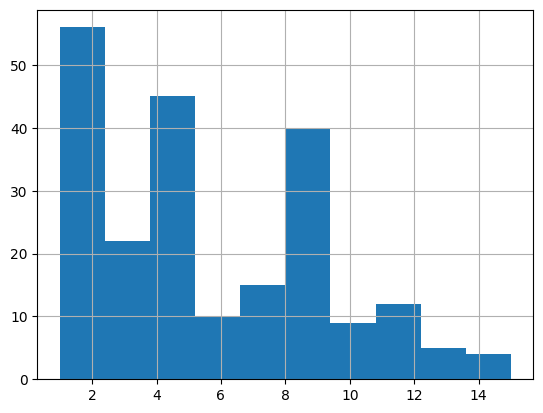

In [28]:
# Calcular la tabla de frecuencias de la columna 'Grupo'
freq_longitudes = pal_long['longitudes'].value_counts()
freq_longitudes = freq_longitudes.sort_index()
print(freq_longitudes)
pal_long['longitudes'].hist()

Longitudes agrupadas por intervalos:

In [29]:
tabla_frecuencias_eje3

,x_i,n_i,f_i,N_i,F_i,Marca_de_clase
0,[1.0-2.56),56,0.256881,56,0.256881,1.780
1,[2.56-4.11),43,0.197248,99,0.454128,3.335
2,[4.11-5.67),24,0.110092,123,0.564220,4.890
3,[5.67-7.22),25,0.114679,148,0.678899,6.445
4,[7.22-8.78),29,0.133028,177,0.811927,8.000
5,[8.78-10.33),20,0.091743,197,0.903670,9.555
6,[10.33-11.89),9,0.041284,206,0.944954,11.110
7,[11.89-13.44),8,0.036697,214,0.981651,12.665
8,[13.44-15.01),4,0.018349,218,1.000000,14.225


### Moda pros y contras:

### Pros:
- Es muy fácil de calcular, sobre todo para variables descritas por las frecuencias de sus valores, ya que consiste en identificar el (los) valor(es) con frecuencia máxima. Si la variable está reducida por intervalos de igual amplitud, podremos obtener la moda de esta manera.

### Contras:
- Realmente no es una medida de posición central. Sin embargo, para variables unimodales y con cierta simetría (esta característica se puede apreciar en el gráfico de barras de frecuencias o en el histograma), sí que representa una centralidad.
- Cuando los valores de la variable no se repiten, no tiene sentido (no nos da ninguna información) ya que todos los valores son modas.
Ejemplo: para la distribución $X=(2, 5, 7, 9, 12)$ todos los valores son moda.


## Cuantiles:

Las ***medidas de posición no central*** más conocidas son los cuantiles, que podemos ver como una generalización de la mediana:

La *mediana* es el cuantil de orden 2: separa los valores ordenados en dos bloques iguales en número de casos.

Los cuartiles $Q_{1}$, $Q_{2}$ y $Q_{3}$son los cuantiles de orden 4: separan los valores ordenados en cuatro bloques iguales en número de casos.

Los percentiles $P_{1}$, $P_{2}$, ..., $P_{99}$ son los de orden 100, y separan los valores ordenados en 100 bloques iguales en número de casos.

Los deciles $D_{1}$, $D_{2}$, ..., $D_{9}$ son los de orden 10.

Otros cuantiles menos habituales: los terciles (orden 3), los quintiles (orden 5) …


## ¿Cómo se calculan?:

Ordenamos los datos: $X_{1} \leq X_{1} \leq ... \leq X_{N}$.

Para el orden $q$ se definen $q-1$ cuantiles de número $r=1, 2, ..., q-1$.

El 𝑟-ésimo cuantil de orden $q$ es el valor que ocupa la posición $\frac{r}{q}(N+1)$:
- si el resultado de la posición es entero, reportamos el valor de esa posición, $X_{i}$ tal que $$i=\frac{r}{q}(N+1)$$
- en otro caso, reportamos la media aritmética de los valores que ocupan las posiciones inmediatamente anterior y posterior a la posición obtenida, esto es, $$\frac{X_{i}+X_{i+1}}{2}$$
tal que $i < \frac{r}{q}(N+1) < i+1$.

**Observación**. Muchos cuantiles de distintos ordenes coinciden, por ejemplo:
$Q_{1} = P_{2}$ (la cuarta parte es el 25%);

$Q_{2} = Me = P_{50}$ (2/4=1/2=50/100);

$Q_{3} = P_{75}$ (3/4=75/100).


### Cuantiles: Ejercicio:
Calcular los cuantiles

El objetivo de este ejercicio es calcular los diferentes cuantiles de la longitud de las palabras del texto:

***Texto:***

**Este texto que estás leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el número mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio práctico que nos permite comprender cómo funcionan los cálculos de estadísticas descriptivas aplicadas al análisis lingüístico.
En este contexto, la longitud de las palabras se refiere al número de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrarás palabras cortas, como "este", "es", "un", "de", así como palabras más largas como "ilustrativo", "estadísticas", "descriptivas", entre otras.
El objetivo es determinar el número mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea más clara de la extensión promedio de las palabras utilizadas aquí. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.
Este ejercicio es útil en diversos contextos, desde análisis de texto en lingüística computacional hasta la elaboración de informes y análisis de contenido en campos como la investigación académica, la publicidad y el procesamiento del lenguaje natural.
Es importante destacar que el cálculo del número mediano de longitud de palabras nos brinda información valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicación efectiva y la comprensión del texto.**


Recordemos que en el ejercicio anterior limpiamos el texto, por lo que utilizaremos la variable creada **texto_limpio**.
Calcularemos los valores que dividen la distribución de la longitud de las palabras, primero en 4 partes iguales, es decir los cuartiles, y luego en 10 partes iguales, es decir, los deciles.

Cuartiles:

In [30]:
try:
    pal_long = pal_long.sort_values(by="longitudes").reset_index()
except:
    pass
display(pal_long[['longitudes']])
print("------------------------------------------------------------\n------------------------------------------------------------\n")
#por ejemplo los cuartiles:
q=4 #entonces q-1 grupos
#para q1:
print("------------------------------------------------------------\nPara los cuartiles\n------------------------------------------------------------\n")
for r in range(1,q):
    N_1=N_ej3+1
    i=round((r/q)*N_1,2)
    print(f"La posición i es: {i}")
print("------------------------------------------------------------\nPara los deciles\n------------------------------------------------------------\n")
#por ejemplo los deciles:
q=10 #entonces q-1 grupos
#para q1:
for r in range(1,q):
    N_1=N_ej3+1
    i=round((r/q)*N_1,2)
    print(f"La posición i es: {i}")




,longitudes
0,1
1,1
2,1
3,1
4,1
...,...
213,13
214,14
215,14
216,14


------------------------------------------------------------
------------------------------------------------------------

------------------------------------------------------------
Para los cuartiles
------------------------------------------------------------

La posición i es: 54.75
La posición i es: 109.5
La posición i es: 164.25
------------------------------------------------------------
Para los deciles
------------------------------------------------------------

La posición i es: 21.9
La posición i es: 43.8
La posición i es: 65.7
La posición i es: 87.6
La posición i es: 109.5
La posición i es: 131.4
La posición i es: 153.3
La posición i es: 175.2
La posición i es: 197.1


In [31]:
# Calculamos los cuantiles: cuartiles
cuantiles = [0.25, 0.50, 0.75]
resultados_cuantiles = pal_long['longitudes'].quantile(cuantiles)

# Mostramos los resultados
print("\nCuartiles:")
print(resultados_cuantiles)


Cuartiles:
0.25    2.0
0.50    5.0
0.75    8.0
Name: longitudes, dtype: float64


In [32]:
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
resultados_deciles = pal_long['longitudes'].quantile(deciles)

# Mostramos los resultados
print("Deciles:")
print(resultados_deciles)

Deciles:
0.1     2.0
0.2     2.0
0.3     3.0
0.4     4.0
0.5     5.0
0.6     6.0
0.7     8.0
0.8     8.0
0.9    10.0
Name: longitudes, dtype: float64


### Cuartiles para una variable por intervalo
Si la variable $X$ está reducida por intervalos, tomaremos como cuantil r-ésimo de orden $q$ la marca de clase del primer intervalo tal que su frecuencia absoluta acumulada sea mayor o igual a $\frac{r}{q}(N+1)$.
De manera equivalente, también podemos obtenerlo buscando el primer intervalo tal que su frecuencia absoluta relativa sea mayor o igual a $\frac{r}{q}$.
Esto es, el intervalo $i$ tal que:

$$N_{i} \geq \frac{r}{q}(N+1)$$
y
$$N_{i-1} < \frac{r}{q}(N+1)$$

O de manera equivalente, $F_{i} \geq \frac{r}{q} $ y $F_{i-1} < \frac{r}{q} $



### Cuantiles: Ejercicio:
Calcular los cuantiles de datos agrupados por intervalos:

El objetivo de este ejercicio es calcular los diferentes cuantiles de la longitud de las palabras del texto que está por agregada por intervalos (ver tabla *tabla_frecuencias_eje3*)


In [33]:
print(tabla_frecuencias_eje3)


             x_i  n_i       f_i  N_i       F_i  Marca_de_clase
0     [1.0-2.56)   56  0.256881   56  0.256881           1.780
1    [2.56-4.11)   43  0.197248   99  0.454128           3.335
2    [4.11-5.67)   24  0.110092  123  0.564220           4.890
3    [5.67-7.22)   25  0.114679  148  0.678899           6.445
4    [7.22-8.78)   29  0.133028  177  0.811927           8.000
5   [8.78-10.33)   20  0.091743  197  0.903670           9.555
6  [10.33-11.89)    9  0.041284  206  0.944954          11.110
7  [11.89-13.44)    8  0.036697  214  0.981651          12.665
8  [13.44-15.01)    4  0.018349  218  1.000000          14.225


In [34]:
# @title Rta cuantiles por intervalos: { vertical-output: true }
#cuartiles:
print(f"\nLos cuartiles de los datos agrupados por intervalos son:\n")
q=4
for i in range(1,q):
    pto=i/q
    # print(pto)
    q_i=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['F_i'] >= pto).idxmax(),"Marca_de_clase"])
    print(f"El cuartil {i} de longitud de palabras del texto de prueba es: {q_i}")


print(f"\nLos Deciles de los datos agrupados por intervalos son:\n")
q=10
for i in range(1,q):
    pto=i/q
    # print(pto)
    q_i=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['F_i'] >= pto).idxmax(),"Marca_de_clase"])
    print(f"El decil {i} de longitud de palabras del texto de prueba es: {q_i}")






Los cuartiles de los datos agrupados por intervalos son:

El cuartil 1 de longitud de palabras del texto de prueba es: 2
El cuartil 2 de longitud de palabras del texto de prueba es: 5
El cuartil 3 de longitud de palabras del texto de prueba es: 8

Los Deciles de los datos agrupados por intervalos son:

El decil 1 de longitud de palabras del texto de prueba es: 2
El decil 2 de longitud de palabras del texto de prueba es: 2
El decil 3 de longitud de palabras del texto de prueba es: 3
El decil 4 de longitud de palabras del texto de prueba es: 3
El decil 5 de longitud de palabras del texto de prueba es: 5
El decil 6 de longitud de palabras del texto de prueba es: 6
El decil 7 de longitud de palabras del texto de prueba es: 8
El decil 8 de longitud de palabras del texto de prueba es: 8
El decil 9 de longitud de palabras del texto de prueba es: 10


## Medidas de dispersión:

Cuantifican cuánto ***varía*** la variable de estudio (cómo los valores se distinguen de sus valores centrales).

* **Desviación típica**:
Geométricamente, la **desviación típica** mide lo lejos que está la variable de ser constante, en concreto de tomar siempre el valor $\bar{X}$:

$$\sigma_{X}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\mu_{X})^{2}}$$

* **Varianza**:
Es definida como el cuadrado de la desviación típica.
$$Var(X) = \sigma_{X}^{2}=\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\mu_{X})^{2}$$

donde $N$ es el tamaño de la población y $\mu_{X}$ es conocida como la media poblacional.


### ¿Cómo se calcula la varianza?

Las siguientes expresiones son equivalentes para calcular la varianza, que dependiendo de la información de la que dispongamos nos pueden facilitar su cálculo. Esto nos permite definir la varianza como la diferencia de la media de los cuadrados con respecto al cuadrado de la media:


$$Var(X) = \sigma_{X}^{2}=\frac{1}{N} \sum_{i=1}^{N}(x_{i}-\mu_{X})^{2} = \frac{1}{N}\sum_{i=1}^{N}X_{i}^{2}-\mu_{X}^{2} = \bar{X^{2}}-\mu_{X}^{2} = \frac{1}{N}\Big(\sum_{i=1}^{N}X_{i}^{2}-\frac{(\sum_{i=1}^{N}X_{i})^{2}}{N}\Big)$$

La última expresión es la más recomendable para realizar las cuentas manualmente: requiere la suma y la suma de cuadrados.

Si $X$ está reducida por intervalos entonces se aproximan $\sigma_{X}$ y $\sigma_{X}^{2}$ usando las marcas de clase, como en el caso de la media $\bar{X}$.








### Ejemplo:

Ejercicio de cálculo de varianza y desviación típica:

El propósito de este ejercicio es calcular la varianza y la desviación estándar de la longitud de las palabras del texto dado. Utilizaremos el mismo texto de ejemplo de los ejercicios anteriores y realizaremos los cálculos paso a paso.


In [35]:
display(pal_long[['longitudes']])

# Calculamos la media
media = sum(longitudes) / len(longitudes)
print("Media:", media)

# Calculamos la suma de los cuadrados de las diferencias
suma_cuadrados_diferencias = sum((x - media) ** 2 for x in longitudes)
print("Suma de los cuadrados de las diferencias:", suma_cuadrados_diferencias)

# Calculamos la varianza
varianza = suma_cuadrados_diferencias / len(longitudes)
print("Varianza:", varianza)

# Calculamos la desviación estándar
desviacion_estandar = varianza ** 0.5
print("Desviación estándar:", desviacion_estandar)





,longitudes
0,1
1,1
2,1
3,1
4,1
...,...
213,13
214,14
215,14
216,14


Media: 5.591743119266055
Suma de los cuadrados de las diferencias: 2444.665137614679
Varianza: 11.21406026428752
Desviación estándar: 3.3487401010361375


Cálculo a través de funciones de Python (dentro de la librería Numpy):


In [36]:
# Calculamos la varianza y la desviación típica con numpy
varianza_np = np.var(longitudes)
desviacion_estandar_np = np.std(longitudes)

print("Varianza (con numpy):", round(varianza_np,2))
print("Desviación estándar (con numpy):", round(desviacion_estandar_np,2))

Varianza (con numpy): 11.21
Desviación estándar (con numpy): 3.35


### Propiedades de la desviación típica y la varianza:

Propiedades de la Varianza:

* La varianza es una medida no negativa, es decir, $\sigma^{2}_{X} \geq 0$ para cualquier variable aleatoria $X$.
    
* La varianza es cero si y solo si todos los valores de la variable aleatoria son iguales, es decir, $\sigma_{X}^{2} = 0 \iff X = c$ para algún $c \in \mathbb{R}$.
    
* La varianza de una constante multiplicada por una variable aleatoria es igual a la constante al cuadrado multiplicada por la varianza de la variable aleatoria, es decir, $\sigma_{cX}^{2} =  c^{2}\sigma^{2}_{X}$.
    
* La varianza de la suma de dos variables aleatorias independientes es igual a la suma de sus varianzas, es decir, $\sigma^{2}_{X + Y} = \sigma^{2}_{X} + \sigma^{2}_{Y}$ para variables aleatorias $X$ e $Y$ independientes.


Propiedades de la Desviación Típica:
    
* Al igual que la varianza, la desviación típica es una medida no negativa, es decir, $\sigma_{X} \geq 0$.
    
* La desviación típica mide la dispersión de los datos alrededor de la media de la misma manera que la varianza, pero está en la misma escala que los datos originales, lo que facilita su interpretación.
    
* Las propiedades de la desviación típica son esencialmente las mismas que las de la varianza, ya que la desviación típica es simplemente la raíz cuadrada de la varianza.

***Ejemplo:***

Supongamos que tenemos una variable aleatoria $X$ cuyos valores son $1, 2, 3$ con igual probabilidad. Queremos calcular la varianza de $2X$.


Primero, calculemos la media de $X$:
$$
\bar{X} = \frac{1+2+3}{3} = 2.
$$

La varianza de $X$ es:
$$
Var(X) = E[(X - \mu_{X})^2] = \frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3} = \frac{2}{3}.
$$

Aplicando la propiedad, obtenemos:
$$
Var(2X) = 2^2 \cdot Var(X) = 4 \cdot \frac{2}{3} = \frac{8}{3}.
$$




Cálculo de la cuasivarianza y la cuasidesviación típica vía función de Python :

In [37]:
# Calculamos la cuasi varianza y la cuasi desviación típica con numpy
varianza_np = np.var(longitudes, ddof=1) #con ddof=1 es para ajustar el divisor a n-1
desviacion_estandar_np = np.std(longitudes, ddof=1)

print("Varianza (con numpy):", round(varianza_np,2))
print("Desviación estándar (con numpy):", round(desviacion_estandar_np,2))


Varianza (con numpy): 11.27
Desviación estándar (con numpy): 3.36


### Cuasivarianza y cuasidesviación típica

La cuasivarianza y la cuasidesviación típica se definen de manera muy similar a la sus versiones *plenas*. La única diferencia es que, en este caso, se divide por $n-1$, donde $n$ es el tamaño de la mustra.

$$S_{X}=\sqrt{\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}}$$
$$Var(X) = S_{X}^{2}=\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}$$,
donde $\bar{X}$ es la media estimada en la muestra.

- Las propiedades son las mismas que en el caso de la varianza y la desviación típica.
<!-- <font color='red'>bar</font> -->

## Medidas de dispersión absolutas y relativas:

La (cuasi)varianza y la (cuasi)desviación típica son **medidas de dispersión absoluta**.

La medida de dispersión absoluta más básica es el **recorrido** o **rango**:
$$Re(X) = \max(X)-\min(X)$$

Para comparar la dispersión en dos variables, o en dos grupos dentro de una variable, no es suficiente conocer la dispersión absoluta. Por ejemplo, una varianza igual a 4 es enorme si la variable es el número de hijos de los propietarios de una comunidad de vecinos, pero es pequeñísima si la variable es la población de los municipios de una región.

Para ello, y para tener una medida de la dispersión que no se vea afectada por cambios de escala, se definen las **medidas de dispersión relativas**.

El recorrido relativo es la medida relativizada del recorrido:
$$Rr(X) = \frac{Re(X)}{|\bar{X}|}$$


In [38]:
longitud_minima = min(longitudes)
longitud_maxima = max(longitudes)
rango = longitud_maxima-longitud_minima
recorrido = round(abs(rango/np.mean(longitudes)),2)
print(f"La longitud mínima es {longitud_minima} y la máxima es {longitud_maxima}\nel rango es {rango} y el recorrido es {recorrido}")

La longitud mínima es 1 y la máxima es 15
el rango es 14 y el recorrido es 2.5


## Coeficiente de variación de Pearson

El coeficiente de variación (de Pearson) es la medida de dispersión relativa más importante, una medida relativizada de la desviación típica:
$$CV(X) = \frac{S_{X}}{\bar{X}}*100$$

El coeficiente de variación de Pearson (CV) es una medida de variabilidad relativa que se utiliza para comparar la dispersión de diferentes conjuntos de datos en términos de su desviación estándar y su media. A continuación, se presentan algunas propiedades importantes del coeficiente de variación de Pearson:

* El coeficiente de variación de Pearson es adimensional, lo que significa que es independiente de la escala de los datos. Esto hace que sea una medida útil para comparar la variabilidad relativa de diferentes conjuntos de datos, incluso si tienen diferentes unidades o escalas de medición.
    
* El coeficiente de variación de Pearson se expresa como un porcentaje, lo que facilita su interpretación. Cuanto mayor sea el valor del coeficiente de variación, mayor será la dispersión de los datos en relación con su media, y viceversa.
    
* El coeficiente de variación de Pearson es sensible a los cambios en la escala de los datos. Esto significa que si los datos se escalan por un factor constante, el coeficiente de variación también cambiará en consecuencia.
    
* El coeficiente de variación de Pearson es útil para comparar la dispersión de diferentes conjuntos de datos, pero puede no ser apropiado para conjuntos de datos con media cercana a cero, ya que el coeficiente de variación puede volverse indefinido o extremadamente grande en tales casos.


**Nota**. La unidad de la varianza es la de la variable elevada al cuadrado, la de la desviación típica es la de la propia variable, mientras que para las medidas de dispersión relativas desaparece la unidad.




## Valores tipificados:

La tipificación de una variable es un proceso estadístico que transforma los datos originales en una nueva escala, generalmente con una media de 0 y una desviación estándar de 1. Esto se logra restando la media de los datos originales y dividiendo por la desviación típica. La variable resultante se conoce como variable tipificada.

Matemáticamente, la tipificación de una variable \(X\) se define como:

$$
X_{\text{tip}} = \frac{X - \mu}{\sigma}
$$

Donde:
* $(X_{\text{tip}})$ es la variable tipificada.
* $(X)$ es la variable original.
* $(\mu)$ es la media de la variable original.
* $(\sigma)$ es la desviación estándar de la variable original.

La tipificación es útil para comparar diferentes conjuntos de datos que pueden tener diferentes escalas y unidades de medida. También puede simplificar el análisis estadístico al centrar los datos alrededor de cero y estandarizar su dispersión.

### Ejemplo de Aplicación

Consideremos el ejemplo de la longitud de las palabras dentro del texto que hemos estado trabajando:


Longitudes de las palabras: \{4, 2, 2, 7, 2, 5, 3, 9, 8, 2, 8, 3, 7\}

Calculemos la variable tipificada para estas longitudes. Primero, calculamos la media y la desviación estándar de las longitudes de las palabras.

Media (\(\mu\)):  \( \frac{1}{13} \sum_{i=1}^{13} x_i \)

Desviación estándar (\(\sigma\)):  \( \sqrt{\frac{1}{13} \sum_{i=1}^{13} (x_i - \mu)^2} \)

Luego, tipificamos cada longitud de palabra utilizando la fórmula anterior.

Datos originales: [4, 5, 3, 5, 7, 5, 5, 5, 4, 2, 7, 11, 4, 8, 2, 6, 7, 2, 2, 8, 2, 8, 6, 2, 2, 5, 11, 2, 2, 9, 8, 3, 3, 7, 10, 4, 9, 3, 8, 2, 12, 12, 9, 2, 8, 11, 2, 4, 8, 2, 8, 2, 3, 8, 2, 7, 2, 6, 2, 10, 3, 8, 4, 7, 15, 2, 8, 4, 5, 11, 8, 6, 4, 6, 4, 4, 4, 3, 4, 8, 3, 6, 4, 13, 14, 14, 5, 5, 2, 8, 2, 10, 2, 6, 7, 2, 10, 3, 9, 3, 8, 2, 4, 5, 2, 8, 4, 5, 7, 5, 3, 4, 3, 5, 2, 2, 9, 8, 2, 3, 8, 10, 4, 4, 7, 7, 7, 3, 10, 2, 3, 8, 2, 5, 1, 5, 1, 9, 2, 5, 5, 4, 9, 2, 4, 2, 8, 9, 5, 8, 2, 5, 2, 11, 13, 5, 2, 11, 2, 8, 1, 8, 2, 9, 2, 6, 4, 2, 13, 9, 2, 10, 1, 2, 13, 3, 8, 7, 2, 10, 8, 3, 2, 7, 3, 6, 7, 2, 8, 2, 8, 3, 6, 11, 7, 5, 2, 10, 1, 11, 3, 8, 9, 2, 3, 5, 5, 13, 14, 2, 2, 12, 8, 1, 2, 11, 3, 5]
Datos tipificados: [-0.4753259647631515, -0.17670619439321766, -0.7739457351330853, -0.17670619439321766, 0.4205333463466499, -0.17670619439321766, -0.17670619439321766, -0.17670619439321766, -0.4753259647631515, -1.072565505503019, 0.4205333463466499, 1.615012427826385, -0.4753259647631515, 0.71

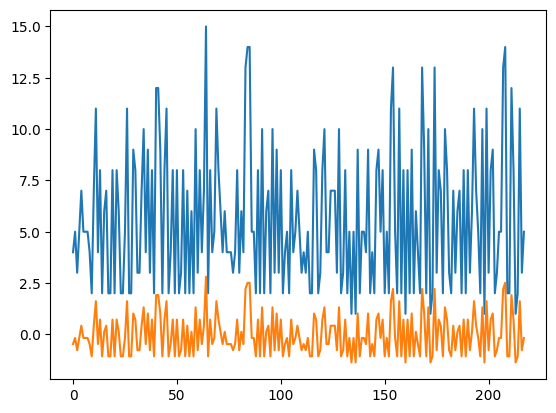

In [39]:
# Calcular la media y la desviación típica
media = np.mean(longitudes)
desviacion_estandar = np.std(longitudes)

# Tipificar los datos
datos_tipificados = [(x - media) / desviacion_estandar for x in longitudes]

print("Datos originales:", longitudes)
print("Datos tipificados:", datos_tipificados)

plt.plot(longitudes)
plt.plot(datos_tipificados)

## Razones:

La razón es una cantidad que compara mediante cociente el número de casos de una categoría con respecto al número de casos de otra categoría, por lo tanto, para obtener la razón de dos categorías, por ejemplo la 1 y la 2, tenemos:
$$\text{razón}=\frac{(\# categoría 1)}{(\# categoría 2)}$$

Es habitual expresar las razones en porcentaje, esto es, por cada 100 unidades (de la categoría referencia, en nuestro caso la categoría 2):
$$\text{razón}\times 100\%=\frac{(\# categoría 1)}{(\# categoría 2)}\times 100\%$$


**Consideremos el texto del ejemplo anterior.**

Para calcular la razón de la longitud de las palabras en este texto, primero necesitamos calcular la longitud de cada palabra. Luego, podemos determinar la razón entre la longitud de cada palabra y la longitud total de todas las palabras en el texto.

**Cálculo de la Razón de la Longitud de las Palabras**

Razón de la longitud de las palabras:
$$
\begin{align*}
\text{Razón} &= \frac{\text{Longitud de cada palabra}}{\text{Longitud total de todas las palabras}}
\end{align*}
$$

Los valores de la variable *razon_longitudes* que se obtiene a continuación, representan la proporción de la longitud de cada palabra con respecto a la longitud total de todas las palabras en el texto.


In [40]:
# Calcular la longitud total de todas las palabras
longitud_total = sum(longitudes)

# Calcular la razón de la longitud de las palabras
razon_longitudes = [longitud / longitud_total for longitud in longitudes]

# Imprimir los resultados
print("Longitudes de las palabras:", longitudes)
print("Longitud total de todas las palabras:", longitud_total)
print("Razón de la longitud de las palabras:", razon_longitudes)


Longitudes de las palabras: [4, 5, 3, 5, 7, 5, 5, 5, 4, 2, 7, 11, 4, 8, 2, 6, 7, 2, 2, 8, 2, 8, 6, 2, 2, 5, 11, 2, 2, 9, 8, 3, 3, 7, 10, 4, 9, 3, 8, 2, 12, 12, 9, 2, 8, 11, 2, 4, 8, 2, 8, 2, 3, 8, 2, 7, 2, 6, 2, 10, 3, 8, 4, 7, 15, 2, 8, 4, 5, 11, 8, 6, 4, 6, 4, 4, 4, 3, 4, 8, 3, 6, 4, 13, 14, 14, 5, 5, 2, 8, 2, 10, 2, 6, 7, 2, 10, 3, 9, 3, 8, 2, 4, 5, 2, 8, 4, 5, 7, 5, 3, 4, 3, 5, 2, 2, 9, 8, 2, 3, 8, 10, 4, 4, 7, 7, 7, 3, 10, 2, 3, 8, 2, 5, 1, 5, 1, 9, 2, 5, 5, 4, 9, 2, 4, 2, 8, 9, 5, 8, 2, 5, 2, 11, 13, 5, 2, 11, 2, 8, 1, 8, 2, 9, 2, 6, 4, 2, 13, 9, 2, 10, 1, 2, 13, 3, 8, 7, 2, 10, 8, 3, 2, 7, 3, 6, 7, 2, 8, 2, 8, 3, 6, 11, 7, 5, 2, 10, 1, 11, 3, 8, 9, 2, 3, 5, 5, 13, 14, 2, 2, 12, 8, 1, 2, 11, 3, 5]
Longitud total de todas las palabras: 1219
Razón de la longitud de las palabras: [0.003281378178835111, 0.004101722723543888, 0.002461033634126333, 0.004101722723543888, 0.005742411812961444, 0.004101722723543888, 0.004101722723543888, 0.004101722723543888, 0.003281378178835111, 0.00164

## Tasas:

La tasa es una medida que expresa la relación entre dos cantidades. En el contexto de la estadística y la probabilidad, la tasa se define como el número de eventos favorables dividido por el número total de eventos potenciales.

Matemáticamente, la tasa se expresa como:

$$\text{Tasa} = \frac{\text{# de Favorables}}{\text{# de Potenciales}} $$

Las tasas son útiles para comparar la ocurrencia de eventos en diferentes situaciones y proporcionan una medida relativa de la probabilidad de que ocurra un evento en relación con el total de eventos posibles.

**Propiedades de las Tasas**

Algunas propiedades importantes de las tasas incluyen:

* Las tasas son adimensionales, lo que significa que no tienen unidades de medida.
* Las tasas pueden ser expresadas como fracciones, decimales o porcentajes, dependiendo de la conveniencia y el contexto.
* Las tasas pueden compararse entre diferentes poblaciones o situaciones para evaluar la probabilidad relativa de ocurrencia de un evento.


### Ejemplo de Aplicación de Tasas

Consideremos el mismo texto de los ejemplos anteriores:

Para calcular la tasa de aparición de la letra 'e' en este texto, primero necesitamos contar el número total de letras 'e' y dividirlo por el número total de letras en el texto.

**Cálculo de la Tasa de Aparición de la Letra e:**



In [41]:
# Contar el número total de letras
numero_total_letras = len(texto_limpio)

# Contar el número de letras 'e'
numero_letras_e = texto_limpio.count('e')

# Calcular la tasa de aparición de la letra 'e'
tasa_aparicion_e = numero_letras_e / numero_total_letras

# Imprimir los resultados
print("Número total de letras:", numero_total_letras)
print("Número de letras 'e':", numero_letras_e)
print("Tasa de aparición de la letra 'e':", tasa_aparicion_e)

Número total de letras: 1442
Número de letras 'e': 153
Tasa de aparición de la letra 'e': 0.10610263522884882


## Números Índices Simples

Los números índices simples son una herramienta estadística utilizada para comparar una magnitud en dos situaciones, una de las cuales se considera como referencia o base. Se utilizan para medir los cambios relativos en una variable a lo largo del tiempo o en diferentes condiciones.

Matemáticamente, un número índice simple se calcula como:

$$\text{Índice} = \left( \frac{\text{Valor Actual}}{\text{Valor de Referencia}} \right) \times 100 $$

Los números índices simples se expresan generalmente como porcentajes y proporcionan una medida relativa del cambio en una variable con respecto a un valor base.

**Propiedades de los Números Índices Simples**

Algunas propiedades importantes de los números índices simples incluyen:


* Los números índices simples son adimensionales y se expresan como porcentajes.
* Los números índices simples pueden ser utilizados para comparar cualquier tipo de variable, como precios, cantidades, índices de producción, entre otros.
* Los números índices simples son útiles para resaltar los cambios relativos en una variable a lo largo del tiempo o en diferentes situaciones.


### Ejemplo de Aplicación de Números Índices Simples

Consideremos el texto de los ejemplos anteriores:

Supongamos que queremos calcular un índice simple de la longitud de las palabras en este texto, comparándolo con un valor de referencia de longitud promedio de palabras en un texto estándar.

**Cálculo del Índice Simple de la Longitud de las Palabras:**



In [42]:
# @title
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Calcular las longitudes de las palabras
longitudes = [len(palabra) for palabra in palabras]

# Calcular la longitud promedio de las palabras en el texto
longitud_promedio = sum(longitudes) / len(longitudes)

# Valor de referencia de longitud promedio de palabras en un texto estándar
valor_referencia = 5

# Calcular el índice simple de la longitud de las palabras
indice_simple = (longitud_promedio / valor_referencia) * 100

# Imprimir los resultados
# print("Longitudes de las palabras:", longitudes)
print("Longitud promedio de palabras en el texto:", longitud_promedio)
print("Índice simple de la longitud de las palabras:", indice_simple)


Longitud promedio de palabras en el texto: 5.591743119266055
Índice simple de la longitud de las palabras: 111.8348623853211


## N-Gramas:

Los n-gramas son una técnica de procesamiento de texto que divide el texto en secuencias de $N$ elementos consecutivos. Estos elementos pueden ser caracteres, palabras o incluso tokens. En este documento, exploraremos qué son los n-gramas, cómo se calculan y cómo se pueden implementar en Python.

**Definición:**
Un n-grama es una secuencia de $N$ elementos tomados de un texto de manera consecutiva. Por ejemplo, si tenemos la frase "El perro come comida", algunos n-gramas serían:
* 1-gramas (unigramas): [El], [perro], [come], [comida]
* 2-gramas (bigramas): [El perro], [perro come], [come comida]
* 3-gramas (trigramas): [El perro come], [perro come comida]


### Cálculo de los n-gramas:

Para calcular los n-gramas, simplemente deslizamos una ventana de tamaño $N$ a lo largo del texto y extraemos cada secuencia de $N$ elementos.

Implementación en Python:

A continuación, se muestra un ejemplo de cómo implementar la generación de n-gramas en Python:



In [43]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

# Ejemplo de uso
text = "El perro come comida"
unigrams = generate_ngrams(text, 1)
bigrams = generate_ngrams(text, 2)
trigrams = generate_ngrams(text, 3)

print("Unigramas:", unigrams)
print("Bigramas:", bigrams)
print("Trigramas:", trigrams)


print('En este ejemplo, la función \texttt{generate\_ngrams} toma un texto y un valor $N$ y devuelve una lista de n-gramas correspondientes.')


Unigramas: [('El',), ('perro',), ('come',), ('comida',)]
Bigramas: [('El', 'perro'), ('perro', 'come'), ('come', 'comida')]
Trigramas: [('El', 'perro', 'come'), ('perro', 'come', 'comida')]
En este ejemplo, la función 	exttt{generate\_ngrams} toma un texto y un valor $N$ y devuelve una lista de n-gramas correspondientes.


## Análisis de frecuencia de los N-gramas:

El análisis de frecuencia de los n-gramas es una técnica fundamental en el procesamiento de lenguaje natural (PLN) que se utiliza para analizar la frecuencia de ocurrencia de secuencias de $N$ elementos, conocidas como n-gramas, en un texto. Los n-gramas son ampliamente utilizados en tareas como la modelización del lenguaje, la traducción automática, la corrección ortográfica, entre otros.

**Definición:**
Un n-grama es una secuencia contigua de $N$ elementos de un texto o una cadena de caracteres. Los elementos pueden ser palabras, caracteres, sílabas, entre otros. Por ejemplo, en la oración *El perro corre rápidamente*, algunos ejemplos de n-gramas serían los siguientes:

* Unigramas (1-gramas): El, perro, corre, rápidamente.
* Bigramas (2-gramas): El perro, perro corre, corre rápidamente.
* Trigramas (3-gramas): El perro corre, perro corre rápidamente.


Cálculo de Frecuencia:

Para calcular la frecuencia de los n-gramas en un texto, se cuentan las ocurrencias de cada n-grama y se registran en una tabla. Luego, se puede calcular la frecuencia relativa de cada n-grama dividiendo el número de ocurrencias de ese n-grama por el número total de n-gramas en el texto.

Implementación en Python.
A continuación, se muestra una implementación simple en Python para calcular la frecuencia de los n-gramas en un texto utilizando la biblioteca NLTK (Natural Language Toolkit):

Este script tomará el texto de ejemplo, lo tokenizará en palabras, calculará los bigramas y mostrará la frecuencia de cada bigrama en el texto.


El perro : 1
perro corre : 1
corre rápidamente : 1
rápidamente por : 1
por el : 1
el parque : 1
parque . : 1


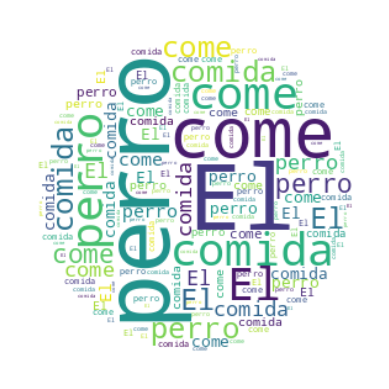

In [44]:
# Texto de ejemplo
texto = "El perro corre rápidamente por el parque."

# Tokenización del texto en palabras
palabras = nltk.word_tokenize(texto)

# Definir el valor de n para los n-gramas
n = 2

# Calcular los n-gramas
ngramas = ngrams(palabras, n)

# Calcular la frecuencia de los n-gramas
frecuencia_ngramas = nltk.FreqDist(ngramas)

# Mostrar los n-gramas y su frecuencia
for ngrama, frecuencia in frecuencia_ngramas.items():
    print(' '.join(ngrama), ':', frecuencia)

#gráfico:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = WordCloud(background_color = "white", repeat = True, mask = mask)
wc.generate(text)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

***
***

# Probabilidad ¡La clave!




<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/prob.png?raw=1" alt="prob" width="50%" height="50%">
</center>

**Motivación**

Frente a un fenómeno aleatorio, el resultado es incierto y su predicción se vuelve un desafío. La probabilidad se convierte en nuestra brújula en este territorio de incertidumbre.

**Analicemos ejemplos:**

# ***¿Cuál será el siguiente término en una secuencia de palabras generada por un modelo de lenguaje?***

Aunque no podemos predecir exactamente qué palabra seguirá, podemos calcular la probabilidad condicional de que una palabra determinada siga a otra dentro del contexto de la secuencia.

# ***¿Qué tan probable es que un mensaje de texto sea spam?***
No podemos afirmar con certeza si un mensaje es spam o no, pero podemos usar técnicas de procesamiento del lenguaje natural, como la clasificación de texto, para calcular la probabilidad de que un mensaje en particular sea spam basado en características como las palabras utilizadas y el contexto.

# ***¿Cuál es la probabilidad de que un documento sea relevante para una consulta de búsqueda?***
Al buscar en un motor de búsqueda, no podemos predecir con certeza qué documentos serán relevantes para la consulta del usuario. Sin embargo, podemos utilizar algoritmos de procesamiento del lenguaje natural y modelos de recuperación de información para calcular la probabilidad de relevancia de un documento en función de la coincidencia de palabras clave y la semántica del texto.




## Conceptos:




### Distribución de probabilidad:

La distribución de probabilidad es una función matemática que describe las posibles ocurrencias de un evento y la probabilidad asociada a cada una de ellas. En otras palabras, indica cómo se distribuyen las probabilidades entre los diferentes resultados posibles de un fenómeno aleatorio.

Una **distribución de probabilidad** es una función $ P: \{ sucesos \} \rightarrow [0,1]$.

Denotamos por $\Omega$ al conjunto total de resultados posibles, donde cada elemento en $ \Omega$ se llama suceso elemental.
El suceso imposible se denota como $\emptyset$.

Un suceso es un conjunto formado mediante la unión, intersección o complementación de **sucesos elementales**. Si $A$ es un **suceso**, $P(A)$  es la probabilidad de $A$, donde $ 0 \leq P(A) \leq 1$.

Para dos sucesos $A$ y $B$:
* $A \cup B $ representa la unión de $A$ y $B$, se cumple si al menos uno de los dos sucesos ocurre.
* $A \cap B$ representa la intersección de $A$ y $B$, se cumple si ambos sucesos ocurren.
* $A^c$ es el complemento de $A$: se cumple exactamente cuando $A$ no ocurre.

**Propiedades:**
Una distribución de probabilidad $P(X)$ para una variable aleatoria discreta $X$ debe satisfacer las siguientes propiedades:
1. $0 \leq P(X = x_i) \leq 1$ para todo valor de $x_i$.
2. La suma de las probabilidades para todos los posibles valores de $X$ es igual a 1:
$ \sum_{i} P(X = x_i) = 1 $.

Además:

*  El **suceso total** es $P(\Omega)=1$.
*  $P(\emptyset)=0$

### Regla de Laplace

En el caso en el que los sucesos elementales sean equiprobables, podemos calcular la probabilidad de un suceso $A$ de la siguiente forma:

$$P(A)=\frac{|A|}{|\Omega|} = \frac{\text{# de casos favorables}}{\text{# de casos posibles}}$$

***Ejemplos:***

Teniendo en cuenta el texto que venimos trabajando, y suponiendo que deseamos calcular la probabilidad de seleccionar una palabra de longitud mayor o igual a 10 caracteres al azar del texto proporcionado. ¿Cuál es la probabilidad de que una palabra elegida al azar tenga esta longitud o mayor?

In [45]:
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar cuántas palabras tienen una longitud mayor o igual a 10 caracteres
num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# Calcular la probabilidad

probabilidad = num_palabras_largas / len(palabras)

print("Número total de palabras (# de casos posibles):", len(palabras))
print("Número de palabras con longitud mayor o igual a 10 (# de casos favorables):", num_palabras_largas)
print("Probabilidad de seleccionar una palabra de longitud mayor o igual a 10:", probabilidad)

Número total de palabras (# de casos posibles): 218
Número de palabras con longitud mayor o igual a 10 (# de casos favorables): 30
Probabilidad de seleccionar una palabra de longitud mayor o igual a 10: 0.13761467889908258


***Ejercicio:***
¿Cuál es la probabilidad de que al seleccionar una palabra al azar del texto de ejemplo, comience por la letra *e*? sabiendo que hay 35 palabras, de las 218 que comienzan por e.

In [46]:
# @title Rta:
# Dividir el texto en palabras
palabras = texto_limpio.split()
# Contar cuántas palabras comienzan con la letra "e"
num_palabras_e = sum(1 for palabra in palabras if palabra.lower().startswith('e'))

# Calcular la probabilidad
probabilidad_palabra_e = num_palabras_e / len(palabras)

print("Número total de palabras:", len(palabras))
print("Número de palabras que comienzan con 'e':", num_palabras_e)
print("Probabilidad de que una palabra comience con 'e':", probabilidad_palabra_e)

Número total de palabras: 218
Número de palabras que comienzan con 'e': 35
Probabilidad de que una palabra comience con 'e': 0.16055045871559634


### Probabilidad condicionada

Dados dos sucesos, $A$ y $B$, si $n_{A \cap B}$ es la frecuencia de resultados en los que se cumplen $A$  y $B$ a la vez en $N$ *experimentos*, entonces $\frac{n_{A \cap B}}{n_{B}}$ expresa la proporción de casos en los que sucede $A$ entre los que sucede $B$.

Como $$\frac{n_{A \cap B}}{n_{B}} = \frac{n_{A \cap B}/N}{n_{B}/N} \xrightarrow[N \rightarrow +\infty]{}\frac{P(A \cap B)}{P(B)},$$

se define la **probabilidad de $A$ condiciona a $B$** como la probabilidad de $A$ si damos por supuesto que sucede $B$, esto es:

$$P(A|B)=\frac{P(A \cap B)}{P(B)}$$.



***Ejemplo:***

Supongamos que queremos calcular la probabilidad de que una palabra seleccionada al azar del texto comience con la letra "e", dado que esa palabra tiene una longitud mayor o igual a 10 caracteres.

Para calcular esta probabilidad condicionada, primero necesitamos contar el número de palabras que cumplen con ambas condiciones (longitud mayor o igual a 10 caracteres y comienzo con "e"), y luego dividirlo por el número total de palabras que tienen una longitud mayor o igual a 10 caracteres.

In [47]:
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar palabras con longitud mayor o igual a 10 caracteres
num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# Contar palabras que comienzan con "e" y tienen longitud mayor o igual a 10 caracteres
num_palabras_e_largas = sum(1 for palabra in palabras if len(palabra) >= 10 and palabra.lower().startswith('e'))

# Calcular la probabilidad condicionada
probabilidad_condicionada = num_palabras_e_largas / num_palabras_largas

print("Número total de palabras con longitud mayor o igual a 10:", num_palabras_largas)
print("Número de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10:", num_palabras_e_largas)
print("Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10:", probabilidad_condicionada)

Número total de palabras con longitud mayor o igual a 10: 30
Número de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10: 4
Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10: 0.13333333333333333


***Ejercicio:***

En el texto dado, consideramos las palabras que tienen una longitud menor a 5 caracteres. Si seleccionamos una palabra al azar de entre estas palabras, ¿cuál es la probabilidad de que esa palabra termine con la letra "s"?

In [ ]:
# @title Rta
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar palabras con longitud menor a 5 caracteres
num_palabras_cortas = sum(1 for palabra in palabras if len(palabra) < 5)

# Contar palabras que terminen con "s" y tienen longitud menora 5 caracteres
num_palabras_s_cortas = sum(1 for palabra in palabras if len(palabra) < 5 and palabra.lower().endswith('s'))

# Calcular la probabilidad condicionada
probabilidad_condicionada = num_palabras_s_cortas / num_palabras_cortas

print("Número total de palabras con longitud menor a 5:", num_palabras_cortas)
print("Número de palabras que terminan con 's' y tienen longitud menor a 10:", num_palabras_s_cortas)
print("Probabilidad de que una palabra termine con 's' dado que tiene longitud menor a 5:", probabilidad_condicionada)